In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler

In [2]:
data_train= pd.read_csv('train.csv')
data_test= pd.read_csv('test.csv')

In [3]:
ID=pd.DataFrame()
ID['Accident_ID']=data_test['Accident_ID']

In [4]:
data_train= data_train.drop(["Accident_ID"],axis=1)
data_test= data_test.drop(["Accident_ID"],axis=1)

In [5]:
data_train=data_train[data_train['Days_Since_Inspection'] < 20]
data_train=data_train[data_train['Days_Since_Inspection'] > 5]

data_train=data_train[data_train['Total_Safety_Complaints'] < 50]


In [6]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder= LabelEncoder()
#data_train['Severity']= label_encoder.fit_transform(data_train['Severity'])
severity = {
            'Minor_Damage_And_Injuries':1, 
            'Significant_Damage_And_Fatalities':2, 
            'Significant_Damage_And_Serious_Injuries':3,
            'Highly_Fatal_And_Damaging':4
            }
data_train.Severity = [severity[item] for item in data_train.Severity] 
data_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [7]:
data_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [8]:
data_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [9]:
data_train["Severity"]


0       1
1       1
2       2
3       3
4       2
       ..
9995    3
9996    4
9997    3
9998    1
9999    4
Name: Severity, Length: 9509, dtype: int64

In [10]:
x = data_train.drop(["Severity"],axis=1)
y = data_train["Severity"]

In [11]:
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=12)

In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [14]:
rf=RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
#print(accuracy_score(y_test,y_pred))

score = 100 * (f1_score(y_test,y_pred, average='weighted'))
score

94.5380893981121

In [15]:
ID.head()

,Accident_ID
0,1
1,10
2,14
3,17
4,21


In [16]:
Y_p = rf.predict(data_test)
ID['Severity']=pd.DataFrame(Y_p)
severity = {
            1:'Minor_Damage_And_Injuries', 
            2:'Significant_Damage_And_Fatalities', 
            3:'Significant_Damage_And_Serious_Injuries',
            4:'Highly_Fatal_And_Damaging'
            }
ID.Severity = [severity[item] for item in ID.Severity] 
ID.to_csv ('RF.csv', index = False)

In [17]:
GB=GradientBoostingClassifier(n_estimators=300)
GB.fit(X_train,y_train)
y_pred=GB.predict(X_test)
#print(accuracy_score(y_test,y_pred))

score = 100 * (f1_score(y_test,y_pred, average='weighted'))
score

96.17036336071439

In [18]:
Y_p = GB.predict(data_test)
ID['Severity']=pd.DataFrame(Y_p)
severity = {
            1:'Minor_Damage_And_Injuries', 
            2:'Significant_Damage_And_Fatalities', 
            3:'Significant_Damage_And_Serious_Injuries',
            4:'Highly_Fatal_And_Damaging'
            }
ID.Severity = [severity[item] for item in ID.Severity] 
ID.to_csv ('GB.csv', index = False)

In [19]:
import lightgbm as ltb
lgbm = ltb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred=lgbm.predict(X_test)
#print(accuracy_score(y_test,y_pred))

score = 100 * (f1_score(y_test,y_pred, average='weighted'))
score

96.7586509092403

In [20]:
Y_p = lgbm.predict(data_test)
ID['Severity']=pd.DataFrame(Y_p)
severity = {
            1:'Minor_Damage_And_Injuries', 
            2:'Significant_Damage_And_Fatalities', 
            3:'Significant_Damage_And_Serious_Injuries',
            4:'Highly_Fatal_And_Damaging'
            }
ID.Severity = [severity[item] for item in ID.Severity] 
ID.to_csv ('lgbm.csv', index = False)

In [21]:
y_pred2=lgbm.predict([[67.4885844748858,11,1,79.3527803099362,0.262380815001803,79.63,7,40120.474820575,4,0.00357842530993307]])

In [22]:
print(y_pred2)

[2]


In [23]:
import seaborn as sns

<Axes: xlabel='Safety_Score', ylabel='Severity'>

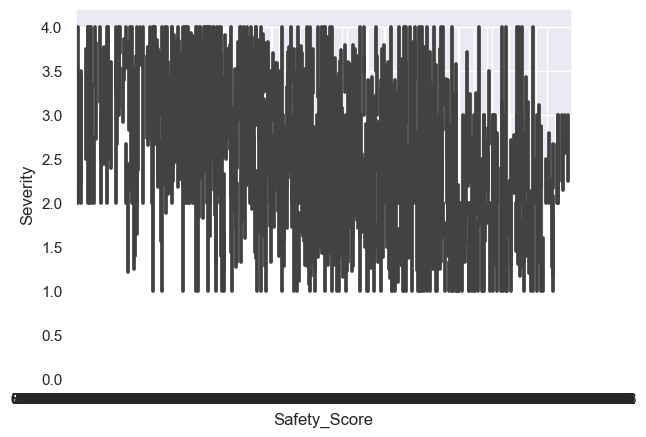

In [24]:
sns.barplot(x='Safety_Score', y ='Severity', data=data_train)

In [25]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9509 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 9509 non-null   int64  
 1   Safety_Score             9509 non-null   float64
 2   Days_Since_Inspection    9509 non-null   int64  
 3   Total_Safety_Complaints  9509 non-null   int64  
 4   Control_Metric           9509 non-null   float64
 5   Turbulence_In_gforces    9509 non-null   float64
 6   Cabin_Temperature        9509 non-null   float64
 7   Accident_Type_Code       9509 non-null   int64  
 8   Max_Elevation            9509 non-null   float64
 9   Violations               9509 non-null   int64  
 10  Adverse_Weather_Metric   9509 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 891.5 KB


In [26]:
print(data_test.columns)

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],
      dtype='object')


In [27]:
def severity1(Safety_Score, Days_Since_Inspection, Total_Safety_Complaints, Control_Metric, Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code, Max_Elevation,Violations,Adverse_Weather_Metric):
#turning the arguments into a numpy array  
    temp=['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities', 'Significant_Damage_And_Serious_Injuries','Highly_Fatal_And_Damaging']
    x = np.array([[Safety_Score, Days_Since_Inspection, Total_Safety_Complaints, Control_Metric, Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code, Max_Elevation,Violations,Adverse_Weather_Metric]])
    prediction = lgbm.predict(x)
    return temp[prediction[0]-1]

In [28]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import gradio as gr

c:\Users\Chirantan Degloorkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
def bar_plot(data_train):
    x = range(len(numbers))
    y = numbers
    plt.plot(x, y)
    plt.title("Line Plot")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    return plt

In [31]:
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=severity1, inputs=['number','number','number','number','number','number','number','number','number','number'], outputs=outputs,title="Airplane Crash Severity Detection")

c:\Users\Chirantan Degloorkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


In [32]:
app.launch()

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


In [33]:
data_train

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883
...,...,...,...,...,...,...,...,...,...,...,...
9995,3,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150
9996,4,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898
9997,3,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173
9998,1,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381


In [34]:
sns.barplot(x='Severity',y='$(data_train['Severity'].value_counts())',data=data_train)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (168049615.py, line 1)

In [ ]:
data_train['Severity'].value_counts()

4    2883
3    2620
1    2394
2    1612
Name: Severity, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data2= pd.read_csv('train.csv')

In [ ]:
data2

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Significant_Damage_And_Serious_Injuries,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150,11493
9996,Highly_Fatal_And_Damaging,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898,305
9997,Significant_Damage_And_Serious_Injuries,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173,612
9998,Minor_Damage_And_Injuries,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381,4963


In [ ]:
incidents = data2.groupby("Severity")["Accident_ID"].count()

In [ ]:
incidents

Severity
Highly_Fatal_And_Damaging                  3049
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Significant_Damage_And_Serious_Injuries    2729
Name: Accident_ID, dtype: int64

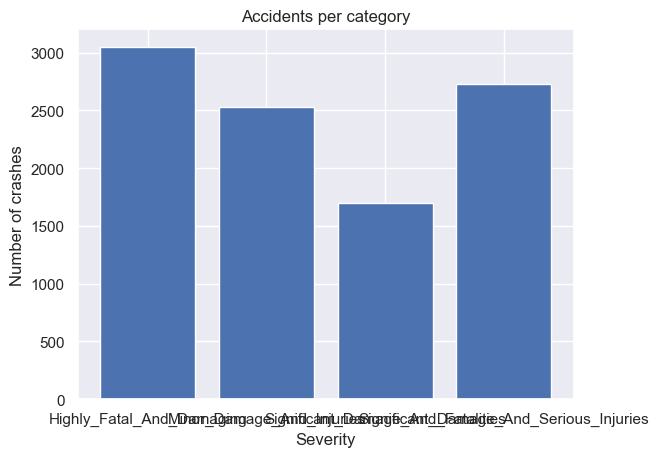

In [ ]:
plt.bar(incidents.index, incidents.values)
plt.title("Accidents per category")
plt.xlabel("Severity")
plt.ylabel("Number of crashes")
plt.show()

In [ ]:
x_label = incidents.index
y_label = incidents.values

def plot_bar_graph(x_labels, y_values):
    fig, ax = plt.subplots()
    ax.bar(x_labels, y_values)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Bar Graph')
    return fig


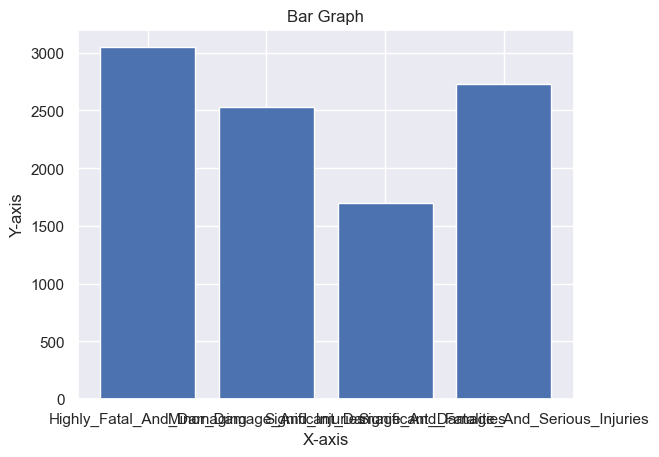

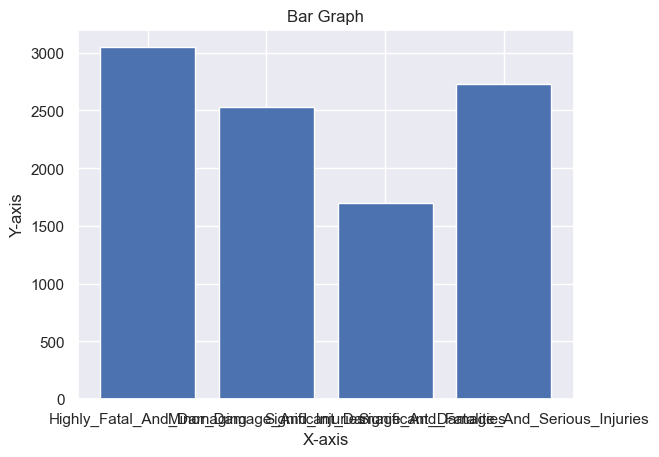

In [ ]:
plot_bar_graph(x_label, y_label)

In [ ]:

# Create interface and launch it
demo = gr.Interface(fn=plot_bar_graph)

TypeError: Interface.__init__() missing 2 required positional arguments: 'inputs' and 'outputs'

In [ ]:
inputs = [gr.inputs.Slider(label='X value', min_value=0, max_value=10, step=1),
          gr.inputs.Slider(label='Y value', min_value=0, max_value=10, step=1)]
outputs = gr.outputs.Image(type='plot', plot_mode='matplotlib')

# Create interface and launch it
gr.Interface(fn=plot_bar_graph, inputs=inputs, outputs=outputs).launch()

TypeError: Slider.__init__() got an unexpected keyword argument 'min_value'

In [ ]:

# define function that generates a bar plot and returns it as a matplotlib figure object
def plot_incidents(Severity):
    fig, ax = plt.subplots()
    ax.bar(incidents.index, incidents.values)
    ax.set_title("Accidents per category")
    ax.set_xlabel("Severity")
    ax.set_ylabel("Number of crashes")
    ax.set_xticklabels(incidents.index,rotation=45,ha="right")
    plt.tight_layout()
    return fig

# create a Gradio interface with a single input (the Pandas Series) and a single output (the plot)
inputs = gr.inputs.Dropdown(choices=df["Severity"].unique().tolist(),label="Select a Category)
outputs = gr.outputs.Image(type="plot", plot_mode="matplotlib")

# launch the interface
demo = gr.Interface(fn=plot_incidents, inputs=inputs, outputs=outputs)

ValueError: The length of the headers list must be equal to the col_count int.
The column count is set to 3 but `headers` has 2 items. Check the values passed to `col_count` and `headers`.